<a href="https://colab.research.google.com/github/HURU-School/Data-Science/blob/main/Age%20Demography%20of%20Ghanaian%20Voters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project - HURU School (Data Science)**
## **Scientific Data Analysis And Data Visualization of the 2020 Electorate Register of The Republic of Ghana**
Student: Francis Miah (DS2021048892)

## Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

A function to generate a direct file link from onedrive download url

In [ ]:
import base64
def create_onedrive_directdownload (onedrive_link):
    data_bytes64 = base64.b64encode(bytes(onedrive_link, 'utf-8'))
    data_bytes64_String = data_bytes64.decode('utf-8').replace('/','_').replace('+','-').rstrip("=")
    resultUrl = f"https://api.onedrive.com/v1.0/shares/u!{data_bytes64_String}/root/content"
    return resultUrl

## Loading the data into the data frame from google drive

In [ ]:
# Input any OneDrive URL 
onedrive_url = "https://1drv.ms/u/s!Ar7Id1qctGAZgxoFV93oCZYgS9EB?e=yWkBnF"
# Generate Direct Download URL from above Script
direct_download_url = create_onedrive_directdownload(onedrive_url)
# Load Dataset to the Dataframe
df1 = pd.read_csv(direct_download_url)

In [ ]:
df1.head(5)

,VoterId,Surname,OtherNames,PhoneNumber,Sex
0,1324000659,AMPONSAH,DEBORAH,247645414.0,1
1,1327000179,SAKYI,YAW,208286128.0,0
2,1324000109,SHEHU,RABI,557343969.0,1
3,1304000921,NKANSAH MENSAH,EMMANUEL,245897537.0,0
4,1305000083,BOATENG,AKUA ANKAMA,249143369.0,1


In [ ]:
df1.shape

(17060678, 5)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17060678 entries, 0 to 17060677
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   VoterId      int64  
 1   Surname      object 
 2   OtherNames   object 
 3   PhoneNumber  float64
 4   Sex          int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 650.8+ MB


In [ ]:
df1.columns

Index(['VoterId', 'Surname', 'OtherNames', 'PhoneNumber', 'Sex'], dtype='object')

In [ ]:
# Input any OneDrive URL 
onedrive_url = "https://1drv.ms/u/s!Ar7Id1qctGAZgxkHhpS8enZv1KlY?e=4vbf9q"
# Generate Direct Download URL from above Script
direct_download_url = create_onedrive_directdownload(onedrive_url)
# Load Dataset to the Dataframe
df2 = pd.read_csv(direct_download_url)

In [ ]:
df2.head(5)

,VoterId,EstimatedAge
0,1324000659,43
1,1327000179,70
2,1324000109,32
3,1304000921,42
4,1305000083,22


In [ ]:
df2.shape

(17060678, 2)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17060678 entries, 0 to 17060677
Data columns (total 2 columns):
 #   Column        Dtype
---  ------        -----
 0   VoterId       int64
 1   EstimatedAge  int64
dtypes: int64(2)
memory usage: 260.3 MB


In [ ]:
df2.columns

Index(['VoterId', 'EstimatedAge'], dtype='object')

In [ ]:
df = pd.merge(df1, df2, on="VoterId")

In [ ]:
df = df.rename(columns={"EstimatedAge": "Age"})

In [ ]:
df = df[df['Age'] < 201]

In [ ]:
df.head(5)

,VoterId,Surname,OtherNames,PhoneNumber,Sex,Age
0,1324000659,AMPONSAH,DEBORAH,247645414.0,1,43
1,1327000179,SAKYI,YAW,208286128.0,0,70
2,1324000109,SHEHU,RABI,557343969.0,1,32
3,1304000921,NKANSAH MENSAH,EMMANUEL,245897537.0,0,42
4,1305000083,BOATENG,AKUA ANKAMA,249143369.0,1,22


In [ ]:
df.shape

(17059638, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17059638 entries, 0 to 17060677
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   VoterId      int64  
 1   Surname      object 
 2   OtherNames   object 
 3   PhoneNumber  float64
 4   Sex          int64  
 5   Age          int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 911.1+ MB


In [ ]:
df.columns

Index(['VoterId', 'Surname', 'OtherNames', 'PhoneNumber', 'Sex', 'Age'], dtype='object')

## Dropping irrelevant columns

In [ ]:
df = df.drop(['Surname', 'OtherNames', 'PhoneNumber'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17059638 entries, 0 to 17060677
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   VoterId  int64
 1   Sex      int64
 2   Age      int64
dtypes: int64(3)
memory usage: 520.6 MB


## Split data by gender

In [ ]:
dfMales = df[df['Sex'] == 0]

In [ ]:
dfMales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8237561 entries, 1 to 17060677
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   VoterId  int64
 1   Sex      int64
 2   Age      int64
dtypes: int64(3)
memory usage: 251.4 MB


In [ ]:
dfFemales = df[df['Sex'] == 1]

In [ ]:
dfFemales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8822077 entries, 0 to 17060676
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   VoterId  int64
 1   Sex      int64
 2   Age      int64
dtypes: int64(3)
memory usage: 269.2 MB


## Measures of central tendency

### Mode Age of the General Electorates

In [ ]:
# mode age of the general electorates
df['Age'].mode()

0    18
dtype: int64

### Mean Age of the General Electorates

In [ ]:
# mean age of the general electorates
round(df['Age'].mean(), 2)

36.85

### Median Age of the General Electorates

In [ ]:
# median age of the general electorates
df['Age'].median()

33.0

### Measures of Dispersion of the General Electorates

In [ ]:
# quantiles
df['Age'].quantile([.35, .5, .75])

0.35    28.0
0.50    33.0
0.75    46.0
Name: Age, dtype: float64

### Range of the ages of the General Electorates

In [ ]:
# Range
df['Age'].max() - df['Age'].min()

173

### Standard Deviation of the General Electorates

In [ ]:
# standard deviation
round(df['Age'].std(),2)

15.27

### Summary Statistics for the General Electorates

In [ ]:
round(df['Age'].describe(),2)

count    17059638.00
mean           36.85
std            15.27
min            18.00
25%            25.00
50%            33.00
75%            46.00
max           191.00
Name: Age, dtype: float64

## Descriptive Statistics of Male Electorates

### Mode Age of all Males

In [ ]:
# mode age of all Males
dfMales['Age'].mode()

0    18
dtype: int64

### Mean Age of all Males

In [ ]:
# mean age of the all Males
round(dfMales['Age'].mean(), 2)

36.32

### Median Age of all Males

In [ ]:
# median age of all Males
dfMales['Age'].median()

33.0

### Measures of Dispersion of all Males

In [ ]:
# quantiles
dfMales['Age'].quantile([.35, .5, .75])

0.35    28.0
0.50    33.0
0.75    45.0
Name: Age, dtype: float64

### Range of the ages of all Males

In [ ]:
# Range
dfMales['Age'].max() - dfMales['Age'].min()

170

### Standard Deviation of all Males

In [ ]:
# standard deviation
round(dfMales['Age'].std(),2)

14.88

### Summary Statistics for all Males

In [ ]:
round(dfMales['Age'].describe(),2)

count    8237561.00
mean          36.32
std           14.88
min           18.00
25%           24.00
50%           33.00
75%           45.00
max          188.00
Name: Age, dtype: float64

## Descriptive Statistics of Female Electorates

### Mode Age of all Females

In [ ]:
# mode age of all Females
dfFemales['Age'].mode()

0    18
dtype: int64

### Mean Age of all Females

In [ ]:
# mean age of the all Females
round(dfFemales['Age'].mean(), 2)

37.35

### Median Age of all Females

In [ ]:
# median age of all Females
dfFemales['Age'].median()

34.0

### Measures of Dispersion of all Females

In [ ]:
# quantiles
dfFemales['Age'].quantile([.35, .5, .75])

0.35    28.0
0.50    34.0
0.75    47.0
Name: Age, dtype: float64

### Range of the ages of all Females

In [ ]:
# Range
dfFemales['Age'].max() - dfFemales['Age'].min()

173

### Standard Deviation of all Females

In [ ]:
# standard deviation
round(dfFemales['Age'].std(),2)

15.61

### Summary Statistics for all Females

In [ ]:
round(dfFemales['Age'].describe(),2)

count    8822077.00
mean          37.35
std           15.61
min           18.00
25%           25.00
50%           34.00
75%           47.00
max          191.00
Name: Age, dtype: float64

## Categorize the data into age ranges for the general electorates and by sex
The ages ranges are:
1. 18 - 19
2. 20 - 29
3. 30 - 39
4. 40 - 49
5. 50 - 59
6. 70 and above

### General Data Categorization


In [ ]:
# Electorals from 18 to 19 years
df18_19 = df[df['Age'] < 20]
df18_19.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1424942 entries, 9 to 17060674
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype
---  ------   --------------    -----
 0   VoterId  1424942 non-null  int64
 1   Sex      1424942 non-null  int64
 2   Age      1424942 non-null  int64
dtypes: int64(3)
memory usage: 43.5 MB


In [ ]:
# Electorals from 20 to 29 years
df20_29 = df[(df['Age'] > 19) & (df['Age'] < 30)]
df20_29.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5293298 entries, 4 to 17060671
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   VoterId  int64
 1   Sex      int64
 2   Age      int64
dtypes: int64(3)
memory usage: 161.5 MB


In [ ]:
# Electorals from 30 to 39 years
df30_39 = df[(df['Age'] > 29) & (df['Age'] < 40)]
df30_39.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148458 entries, 2 to 17060675
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   VoterId  int64
 1   Sex      int64
 2   Age      int64
dtypes: int64(3)
memory usage: 126.6 MB


In [ ]:
# Electorals from 40 to 49 years
df40_49 = df[(df['Age'] > 39) & (df['Age'] < 50)]
df40_49.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772283 entries, 0 to 17060677
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   VoterId  int64
 1   Sex      int64
 2   Age      int64
dtypes: int64(3)
memory usage: 84.6 MB


In [ ]:
# Electorals from 50 to 59 years
df50_59 = df[(df['Age'] > 49) & (df['Age'] < 60)]
df50_59.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728960 entries, 24 to 17060667
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   VoterId  int64
 1   Sex      int64
 2   Age      int64
dtypes: int64(3)
memory usage: 52.8 MB


In [ ]:
# Electorals from 60 years and above
dfOver60 = df[df['Age'] > 59]
dfOver60.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691697 entries, 1 to 17060676
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   VoterId  int64
 1   Sex      int64
 2   Age      int64
dtypes: int64(3)
memory usage: 51.6 MB


In [ ]:
# General Data Categorization Dictionary
genDataDict = {0 : ['18_19', df18_19.shape[0]], 1 : ['20_29', df20_29.shape[0]], 2 : ['30_39', df30_39.shape[0]], 3 : ['40_49', df40_49.shape[0]], 4 : ['50_59', df50_59.shape[0]], 5 : ['60AndAbove', dfOver60.shape[0]]}
print(genDataDict)

{0: ['18_19', 1424942], 1: ['20_29', 5293298], 2: ['30_39', 4148458], 3: ['40_49', 2772283], 4: ['50_59', 1728960], 5: ['60AndAbove', 1691697]}


In [ ]:
# Create a dataframe from the dictionary
genDf = pd.DataFrame.from_dict(genDataDict, orient='index', columns=['AgeGroup','Count'])
genDf.head(6)

,AgeGroup,Count
0,18_19,1424942
1,20_29,5293298
2,30_39,4148458
3,40_49,2772283
4,50_59,1728960
5,60AndAbove,1691697


### Male Data Categorization


In [ ]:
# Male Electorals from 18 to 19 years
dfMales18_19 = dfMales[dfMales['Age'] < 20]
dfMales18_19.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711562 entries, 15 to 17060674
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   VoterId  711562 non-null  int64
 1   Sex      711562 non-null  int64
 2   Age      711562 non-null  int64
dtypes: int64(3)
memory usage: 21.7 MB


In [ ]:
# Male Electorals from 20 to 29 years
dfMales20_29 = dfMales[(dfMales['Age'] > 19) & (dfMales['Age'] < 30)]
dfMales20_29.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2622201 entries, 7 to 17060671
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   VoterId  int64
 1   Sex      int64
 2   Age      int64
dtypes: int64(3)
memory usage: 80.0 MB


In [ ]:
# Male Electorals from 30 to 39 years
dfMales30_39 = dfMales[(dfMales['Age'] > 29) & (dfMales['Age'] < 40)]
dfMales30_39.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001112 entries, 10 to 17060662
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   VoterId  int64
 1   Sex      int64
 2   Age      int64
dtypes: int64(3)
memory usage: 61.1 MB


In [ ]:
# Male Electorals from 40 to 49 years
dfMales40_49 = dfMales[(dfMales['Age'] > 39) & (dfMales['Age'] < 50)]
dfMales40_49.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343953 entries, 3 to 17060677
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype
---  ------   --------------    -----
 0   VoterId  1343953 non-null  int64
 1   Sex      1343953 non-null  int64
 2   Age      1343953 non-null  int64
dtypes: int64(3)
memory usage: 41.0 MB


In [ ]:
# Male Electorals from 50 to 59 years
dfMales50_59 = dfMales[(dfMales['Age'] > 49) & (dfMales['Age'] < 60)]
dfMales50_59.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818202 entries, 42 to 17060667
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   VoterId  818202 non-null  int64
 1   Sex      818202 non-null  int64
 2   Age      818202 non-null  int64
dtypes: int64(3)
memory usage: 25.0 MB


In [ ]:
# Male Electorals from 60 years and above
dfMalesOver60 = dfMales[dfMales['Age'] > 59]
dfMalesOver60.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740531 entries, 1 to 17060588
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   VoterId  740531 non-null  int64
 1   Sex      740531 non-null  int64
 2   Age      740531 non-null  int64
dtypes: int64(3)
memory usage: 22.6 MB


In [ ]:
# Male Data Categorization Dictionary
maleDataDict = {0 : ['18_19', dfMales18_19.shape[0]], 1 : ['20_29', dfMales20_29.shape[0]], 2 : ['30_39', dfMales30_39.shape[0]], 3 : ['40_49', dfMales40_49.shape[0]], 4 : ['50_59', dfMales50_59.shape[0]], 5 : ['60AndAbove', dfMalesOver60.shape[0]]}
print(maleDataDict)

{0: ['18_19', 711562], 1: ['20_29', 2622201], 2: ['30_39', 2001112], 3: ['40_49', 1343953], 4: ['50_59', 818202], 5: ['60AndAbove', 740531]}


In [ ]:
# Create a dataframe from the dictionary
malesDf = pd.DataFrame.from_dict(maleDataDict, orient='index', columns=['AgeGroup','Count'])
malesDf.head(6)

,AgeGroup,Count
0,18_19,711562
1,20_29,2622201
2,30_39,2001112
3,40_49,1343953
4,50_59,818202
5,60AndAbove,740531


### Female Data Categorization


In [ ]:
# Female Electorals from 18 to 19 years
dfFemales18_19 = dfFemales[dfFemales['Age'] < 20]
dfFemales18_19.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713380 entries, 9 to 17060647
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   VoterId  713380 non-null  int64
 1   Sex      713380 non-null  int64
 2   Age      713380 non-null  int64
dtypes: int64(3)
memory usage: 21.8 MB


In [ ]:
# Female Electorals from 20 to 29 years
dfFemales20_29 = dfFemales[(dfFemales['Age'] > 19) & (dfFemales['Age'] < 30)]
dfFemales20_29.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671097 entries, 4 to 17060669
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   VoterId  int64
 1   Sex      int64
 2   Age      int64
dtypes: int64(3)
memory usage: 81.5 MB


In [ ]:
# Female Electorals from 30 to 39 years
dfFemales30_39 = dfFemales[(dfFemales['Age'] > 29) & (dfFemales['Age'] < 40)]
dfFemales30_39.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2147346 entries, 2 to 17060675
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   VoterId  int64
 1   Sex      int64
 2   Age      int64
dtypes: int64(3)
memory usage: 65.5 MB


In [ ]:
# Female Electorals from 40 to 49 years
dfFemales40_49 = dfFemales[(dfFemales['Age'] > 39) & (dfFemales['Age'] < 50)]
dfFemales40_49.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428330 entries, 0 to 17060656
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype
---  ------   --------------    -----
 0   VoterId  1428330 non-null  int64
 1   Sex      1428330 non-null  int64
 2   Age      1428330 non-null  int64
dtypes: int64(3)
memory usage: 43.6 MB


In [ ]:
# Female Electorals from 50 to 59 years
dfFemales50_59 = dfFemales[(dfFemales['Age'] > 49) & (dfFemales['Age'] < 60)]
dfFemales50_59.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 910758 entries, 24 to 17060601
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   VoterId  910758 non-null  int64
 1   Sex      910758 non-null  int64
 2   Age      910758 non-null  int64
dtypes: int64(3)
memory usage: 27.8 MB


In [ ]:
# Female Electorals from 60 years and above
dfFemalesOver60 = dfFemales[dfFemales['Age'] > 59]
dfFemalesOver60.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951166 entries, 14 to 17060676
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   VoterId  951166 non-null  int64
 1   Sex      951166 non-null  int64
 2   Age      951166 non-null  int64
dtypes: int64(3)
memory usage: 29.0 MB


In [ ]:
# Female Data Categorization Dictionary
femalesDataDict = {0 : ['18_19', dfFemales18_19.shape[0]], 1 : ['20_29', dfFemales20_29.shape[0]], 2 : ['30_39', dfFemales30_39.shape[0]], 3 : ['40_49', dfFemales40_49.shape[0]], 4 : ['50_59', dfFemales50_59.shape[0]], 5 : ['60AndAbove', dfFemalesOver60.shape[0]]}
print(femalesDataDict)

{0: ['18_19', 713380], 1: ['20_29', 2671097], 2: ['30_39', 2147346], 3: ['40_49', 1428330], 4: ['50_59', 910758], 5: ['60AndAbove', 951166]}


In [ ]:
# Create a dataframe from the dictionary
femalesDf = pd.DataFrame.from_dict(femalesDataDict, orient='index', columns=['AgeGroup','Count'])
femalesDf.head(6)

,AgeGroup,Count
0,18_19,713380
1,20_29,2671097
2,30_39,2147346
3,40_49,1428330
4,50_59,910758
5,60AndAbove,951166


## Data Visualizations

### General Electorates Visualizations

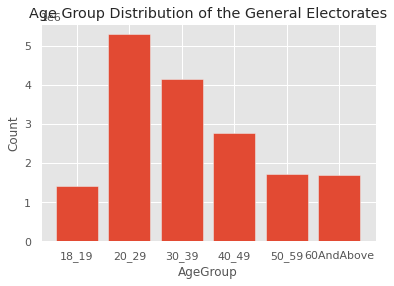

In [ ]:
# histogram of the general data
plt.style.use('ggplot')
plt.bar(genDf['AgeGroup'], genDf['Count'])
plt.title("Age Group Distribution of the General Electorates")
plt.ylabel('Count')
plt.xlabel('AgeGroup');
plt.show()

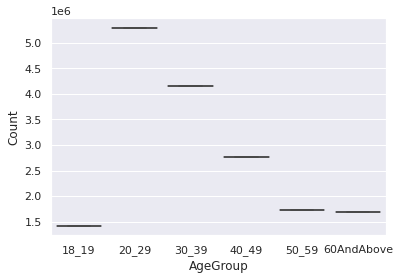

In [ ]:
# box plot of general data
sns.boxplot(x='AgeGroup', y='Count',data = genDf, showfliers=False)

### Male Electorates Visualizations

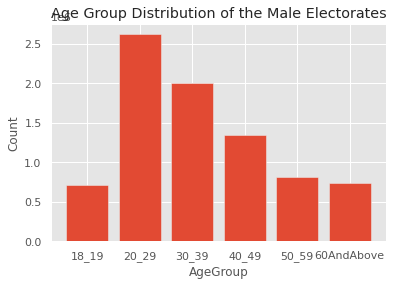

In [ ]:
# histogram of the male data
plt.style.use('ggplot')
plt.bar(malesDf['AgeGroup'], malesDf['Count'])
plt.title("Age Group Distribution of the Male Electorates")
plt.ylabel('Count')
plt.xlabel('AgeGroup');
plt.show()

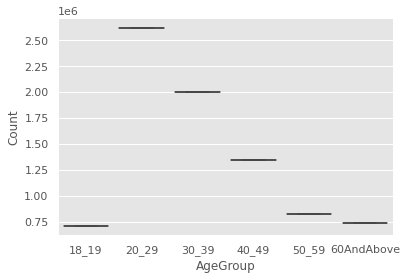

In [ ]:
# box plot of females data
sns.boxplot(x='AgeGroup', y='Count',data = malesDf, showfliers=False)

### Female Electorates Visualizations

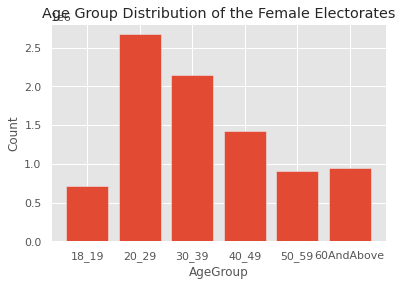

In [ ]:
# histogram of the female data
plt.style.use('ggplot')
plt.bar(femalesDf['AgeGroup'], femalesDf['Count'])
plt.title("Age Group Distribution of the Female Electorates")
plt.ylabel('Count')
plt.xlabel('AgeGroup');
plt.show()

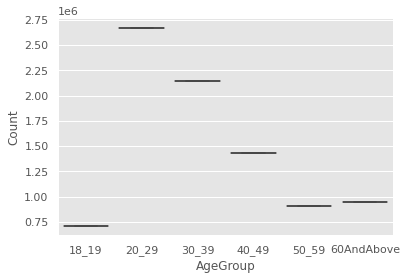

In [ ]:
# box plot of females data
sns.boxplot(x='AgeGroup', y='Count',data = femalesDf, showfliers=False)